# Complexity Project

## Self-Organised Critical Model

This will be a study of the Oslo Model.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:


#initialise the system:
def initialise(L,probability = 0.5):
    '''
    Initialises a pile following the Oslo Model of size L
    probability (float) : probability with which to assign the value 1 to slopes (assign 2 with probability 1-p)
    '''
    #We are going to use a one sided 1D system
    #we need a place to store the slopes and threshold slopes at each site
    #I will use python arrays
    h = 0
    z = np.zeros(L)
    zth = np.zeros(L)
    
    
    #initialise the threshold slopes
    p = np.random.rand(L)  #array of size L with random values between 0 and 1
    zth = (p > probability) + 1  # P > 0.5 returns a series of zeros and ones according to the condition. Adding 1 returns a series of
                        #random one's and two's are required
    
    return h,z,zth

def drive(h,z):
    '''
    h (intiger) : Height at size i = 0
    z (array) : holds slopes value at each site
    The funtion will drive the pile by 1
    '''
    h += 1
    z[0] += 1
    
    return h,z


def relax(h,z,zth,probability = 0.5): 
    '''
    h (intiger) : Height at size i = 0
    z (array) : holds slopes value at each site
    zth (array) : hold threshold slope at each site
    probability (float) : probability with which to assign the value 1 to slopes (assign 2 with probability 1-p)
    The function will iterate until all sites are relaxed according to the oslo model algorythm
    '''
    
    critical = False #just to know when the system has become critical (reached steady state)
    L = len(z)
    c = 0
    avalanche_size = 0
    #we have to relax until there are not more sites to topple
    topple = z > zth #return the locations that need to tople (array with zeros and ones)
    avalanche_size += sum(topple) #by the definition of avalanche size
    
    while any(topple) == True: #while there are still sites to topple
        #print (2*topple)
        if topple[-1] == True: #if the last site topples then the pile has become critical
            critical = True
            #print("critical")
        #h -= topple[0]
        #h[1] += topple[0]
        z[0] -= 2*topple[0]
        z[1] += topple[0]

        
        #the way to update the slope array has been vectorised
        #the traditional way (simple applying the algorythm sequentially) is shown bellow but is commented out
        '''
        #do the rest automatically (appart from the last one)
        for i in range(1,L-1): #this will go up to L-2
            #h[i] -= topple[i]
            #h[i+1] += topple[i]

            z[i] -= 2*topple[i]
            z[i-1] += topple[i]
            z[i+1] += topple[i]
        #'''

        #intsted we use the topple array
        #we cut it and rearrange it in a way that when we appply it on the slopes array (z)
        #all sites are relaxed simultaniously
        
        topple_central = np.concatenate((np.zeros(1),topple[1:-1],np.zeros(1)))
        topple_plus_1 =  np.concatenate((np.zeros(2),topple[1:-1]))
        topple_minus_1 =  np.concatenate((topple[1:-1],np.zeros(2)))
        
        z -= 2*topple_central
        z += 1*topple_plus_1
        z += 1*topple_minus_1
        #'''

        #h[-1] -= topple[-1]   
        z[-1] -= topple[-1]
        z[-2] += topple[-1]
        
        
        #before getting the new toppling sites we need to renew the toppling probabilities of the old ones
        #print(zth)
        p = np.random.rand(L) #this is the same method used in the initialisation
        #print (p)
        new_zth = (p > probability) + 1
        #print (new_zth)
        zth = zth + (topple * (-zth + new_zth))
        #print(h,z,zth)
                
        topple = z > zth #get new toppling sites
        avalanche_size += sum(topple)
        

    return h,z,zth,critical,avalanche_size


In [3]:
#we define a simple function to hold values of the height
#the used can choose to save those values as txt files
hplot = []
def count_hight(n,L):
    h,z,zth = initialise(L)
    height = []
    h1 = []
    for t in range(0,n):
        h,z = drive(h,z)
        h,z,zth,c,s = relax(h,z,zth)   
        #height.append(h)
        h1.append(sum(z))
    return h1
     
h4 = count_hight(10000,4)
#np.savetxt("L_123_height_counts.txt", h4)


In [27]:
#100000 heights where recorded for all sizes and save as txt files
#below is the last call:
#h256 = count_hight(100000,256)
#np.savetxt("L_256_height_counts.txt", h256)

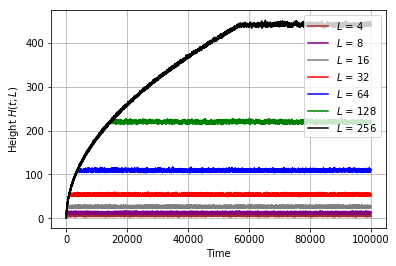

In [32]:
#the heights recorded above are plotted here:
h4 = list(np.loadtxt("L_4_height_counts.txt"))
plt.plot(h4,color = "brown", label = "$L$ = 4")
h8 = list(np.loadtxt("L_8_height_counts.txt"))
plt.plot(h8,color = "purple", label = "$L$ = 8")
h16 = list(np.loadtxt("L_16_height_counts.txt"))
plt.plot(h16,color = "gray", label = "$L$ = 16")
h32 = list(np.loadtxt("L_32_height_counts.txt"))
plt.plot(h32,color = "red", label = "$L$ = 32")
h64 = list(np.loadtxt("L_64_height_counts.txt"))
plt.plot(h64,color = "blue", label = "$L$ = 64")
h128 = list(np.loadtxt("L_128_height_counts.txt"))
plt.plot(h128,color = "green", label = "$L$ = 128")
h256 = list(np.loadtxt("L_256_height_counts.txt"))
plt.plot(h256,color = "black", label = "$L$ = 256")

#h4 = 0 #no reason to hold these very long lists on memory#
#h8 = 0
#h16 = 0
#h32 = 0
#h64 = 0
#h128 = 0
#h256 = 0

plt.grid()
plt.xlabel("Time")
plt.ylabel("Height $H(t;L)$")
plt.legend(loc = "upper right")
#print("Average Height = ",h)
#plt.savefig("Height_time.pdf")

In [8]:
#in the boxes below systems of all sizes are initialised n times and the heights for all of them are
#recorded in csv files
#these are used in the Data_Analysis_Height.ipynb notebook
n = 10
t = 70000
store = np.zeros((n,t))
for i in range(0,n):
    store[i] = count_hight(t,4)
save = pd.DataFrame(store)
save.to_csv("L_4_10_Runs.cvs")

In [9]:
n = 10
t = 70000
store = np.zeros((n,t))
for i in range(0,n):
    store[i] = count_hight(t,8)
save = pd.DataFrame(store)
save.to_csv("L_8_10_Runs.cvs")

In [ ]:
#now we need to collect data for many realisations
#we can define a loop
n = 10
t = 70000
store = np.zeros((n,t))
for i in range(0,n):
    store[i] = count_hight(t,64)
save = pd.DataFrame(store)
save.to_csv("L_64_10_Runs.cvs")

In [59]:
n = 10
t = 10000
store = np.zeros((n,t))
for i in range(0,n):
    store[i] = count_hight(t,32)
save = pd.DataFrame(store)
save.to_csv("L_32_10_Runs.cvs")

In [65]:
n = 10
t = 20000
store = np.zeros((n,t))
for i in range(0,n):
    store[i] = count_hight(t,128)
save = pd.DataFrame(store)
save.to_csv("L_128_10_Runs.cvs")


In [ ]:
n = 10
t = 80000
store = np.zeros((n,t))
for i in range(0,n):
    store[i] = count_hight(t,256)
save = pd.DataFrame(store)
save.to_csv("L_256_10_Runs.cvs")

In [60]:
n = 10
t = 16000
store = np.zeros((n,t))
for i in range(0,n):
    store[i] = count_hight(t,16)
save = pd.DataFrame(store)
save.to_csv("L_16_10_Runs.cvs")

In [7]:
n = 10
t = 30000
store = np.zeros((n,t))
for i in range(0,n):
    store[i] = count_hight(t,512)
save = pd.DataFrame(store)
save.to_csv("L_512_10_Runs.cvs")

### Here we change from measureing height to measuring the critical time

In [6]:
#we will define a function that runs a system until the critical point is reached an then returns the critical time
def find_critical(L):
    h,z,zth = initialise(L)
    t = 0
    c = False #hold whether the pile is critical or not
    i = 0
    while c == False:
        #print("running")
        h,z = drive(h,z)
        t += 1 #add one to the time whenever the the pile is driven
        #print(t)
        h,z,zth,c,s = relax(h,z,zth)   
    return t#,z

     
t = find_critical(4)
print(t)

17


In [9]:
#we can run the above function several times to get a good average of the critical time
t = []
for i in range(10):
    print (i)
    time = find_critical(256)
    t.append(time)
    #zet.append(z)
    
print (np.mean(t))
print( np.std(t))

0
1
2
3
4
5
6
7
8
9
56043.6
387.24700127954503


In [46]:
#need to define another function to measure the slopes after t_c
def count_zet(n,L):
    h,z,zth = initialise(L)
    zet = []
    for t in range(0,n):
        h,z = drive(h,z)
        h,z,zth,c = relax(h,z,zth)   
        #height.append(h)
        zet.append(np.mean(z))
    return zet
     
z1 = count_zet(6000,16)

### Probability Size
The following section concertns measuring the probability size for different system sizes

In [ ]:
#it's faster to run the pile until it becomes crtitical and then start sampling
#we can define
def count_size(n,L): #count avalanche size
    h,z,zth = initialise(L)
    t = 0
    c = False #hold whether the pile is critical or not
    s1 = [] #hold the values of 
    while c == False:
        h,z = drive(h,z)
        t += 1 #add one to the time whenever the the pile is drivenn,
        h,z,zth,c,s = relax(h,z,zth) 
    print("critical!")
    for t in range(0,n):
        h,z = drive(h,z)
        h,z,zth,c,s = relax(h,z,zth)   
        s1.append(s)
    return s1


s = count_size(50000,512)
print("done!")
max(s)

#np.savetxt("L_512_avalanche_size_counts.txt", s) can save avalanche sizes in txt file